# Coupled Oscillators

## Introduction

Coupled oscillators are a fundamental system in physics that appears in numerous contexts: from molecular vibrations and crystal lattices to mechanical systems and electrical circuits. When two or more oscillators interact, their dynamics become intertwined, leading to rich phenomena such as normal modes, energy transfer, and synchronization.

## Theoretical Framework

### Two Coupled Pendulums

Consider two identical pendulums of mass $m$ and length $l$, connected by a spring of constant $k$. The displacements from equilibrium are $x_1$ and $x_2$.

The equations of motion are:

$$m\ddot{x}_1 = -\frac{mg}{l}x_1 - k(x_1 - x_2)$$

$$m\ddot{x}_2 = -\frac{mg}{l}x_2 - k(x_2 - x_1)$$

Defining $\omega_0^2 = \frac{g}{l}$ (natural frequency) and $\omega_c^2 = \frac{k}{m}$ (coupling frequency), we obtain:

$$\ddot{x}_1 = -\omega_0^2 x_1 - \omega_c^2(x_1 - x_2)$$

$$\ddot{x}_2 = -\omega_0^2 x_2 - \omega_c^2(x_2 - x_1)$$

### Normal Mode Analysis

The system can be decoupled by introducing normal coordinates:

$$q_1 = x_1 + x_2 \quad \text{(symmetric mode)}$$
$$q_2 = x_1 - x_2 \quad \text{(antisymmetric mode)}$$

These yield independent oscillators:

$$\ddot{q}_1 = -\omega_0^2 q_1 \quad \Rightarrow \quad \omega_1 = \omega_0$$

$$\ddot{q}_2 = -(\omega_0^2 + 2\omega_c^2) q_2 \quad \Rightarrow \quad \omega_2 = \sqrt{\omega_0^2 + 2\omega_c^2}$$

### Normal Mode Frequencies

- **Symmetric mode** ($\omega_1 = \omega_0$): Both pendulums swing in phase; the spring remains unstretched.
- **Antisymmetric mode** ($\omega_2 = \sqrt{\omega_0^2 + 2\omega_c^2}$): Pendulums swing in opposite directions; the spring provides additional restoring force.

### Beat Phenomenon

When one pendulum is displaced initially, energy transfers back and forth between the oscillators. The beat frequency is:

$$\omega_{\text{beat}} = \omega_2 - \omega_1$$

This manifests as a periodic exchange of oscillation amplitude between the two pendulums.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# System parameters
omega_0 = 1.0      # Natural frequency (rad/s)
omega_c = 0.2      # Coupling frequency (rad/s)

# Time array
t = np.linspace(0, 100, 2000)

def coupled_oscillators(y, t, omega_0, omega_c):
    """
    System of ODEs for two coupled oscillators.
    
    State vector y = [x1, v1, x2, v2]
    where x1, x2 are displacements and v1, v2 are velocities.
    """
    x1, v1, x2, v2 = y
    
    dx1dt = v1
    dv1dt = -omega_0**2 * x1 - omega_c**2 * (x1 - x2)
    dx2dt = v2
    dv2dt = -omega_0**2 * x2 - omega_c**2 * (x2 - x1)
    
    return [dx1dt, dv1dt, dx2dt, dv2dt]

# Initial conditions: first pendulum displaced, second at rest
y0 = [1.0, 0.0, 0.0, 0.0]

# Solve the system
solution = odeint(coupled_oscillators, y0, t, args=(omega_0, omega_c))
x1 = solution[:, 0]
x2 = solution[:, 2]

# Calculate normal mode frequencies
omega_1 = omega_0
omega_2 = np.sqrt(omega_0**2 + 2*omega_c**2)
omega_beat = omega_2 - omega_1
T_beat = 2 * np.pi / omega_beat

print(f"Normal mode frequencies:")
print(f"  ω₁ (symmetric)     = {omega_1:.4f} rad/s")
print(f"  ω₂ (antisymmetric) = {omega_2:.4f} rad/s")
print(f"  Beat frequency     = {omega_beat:.4f} rad/s")
print(f"  Beat period        = {T_beat:.2f} s")

Normal mode frequencies:
  ω₁ (symmetric)     = 1.0000 rad/s
  ω₂ (antisymmetric) = 1.0392 rad/s
  Beat frequency     = 0.0392 rad/s
  Beat period        = 160.16 s


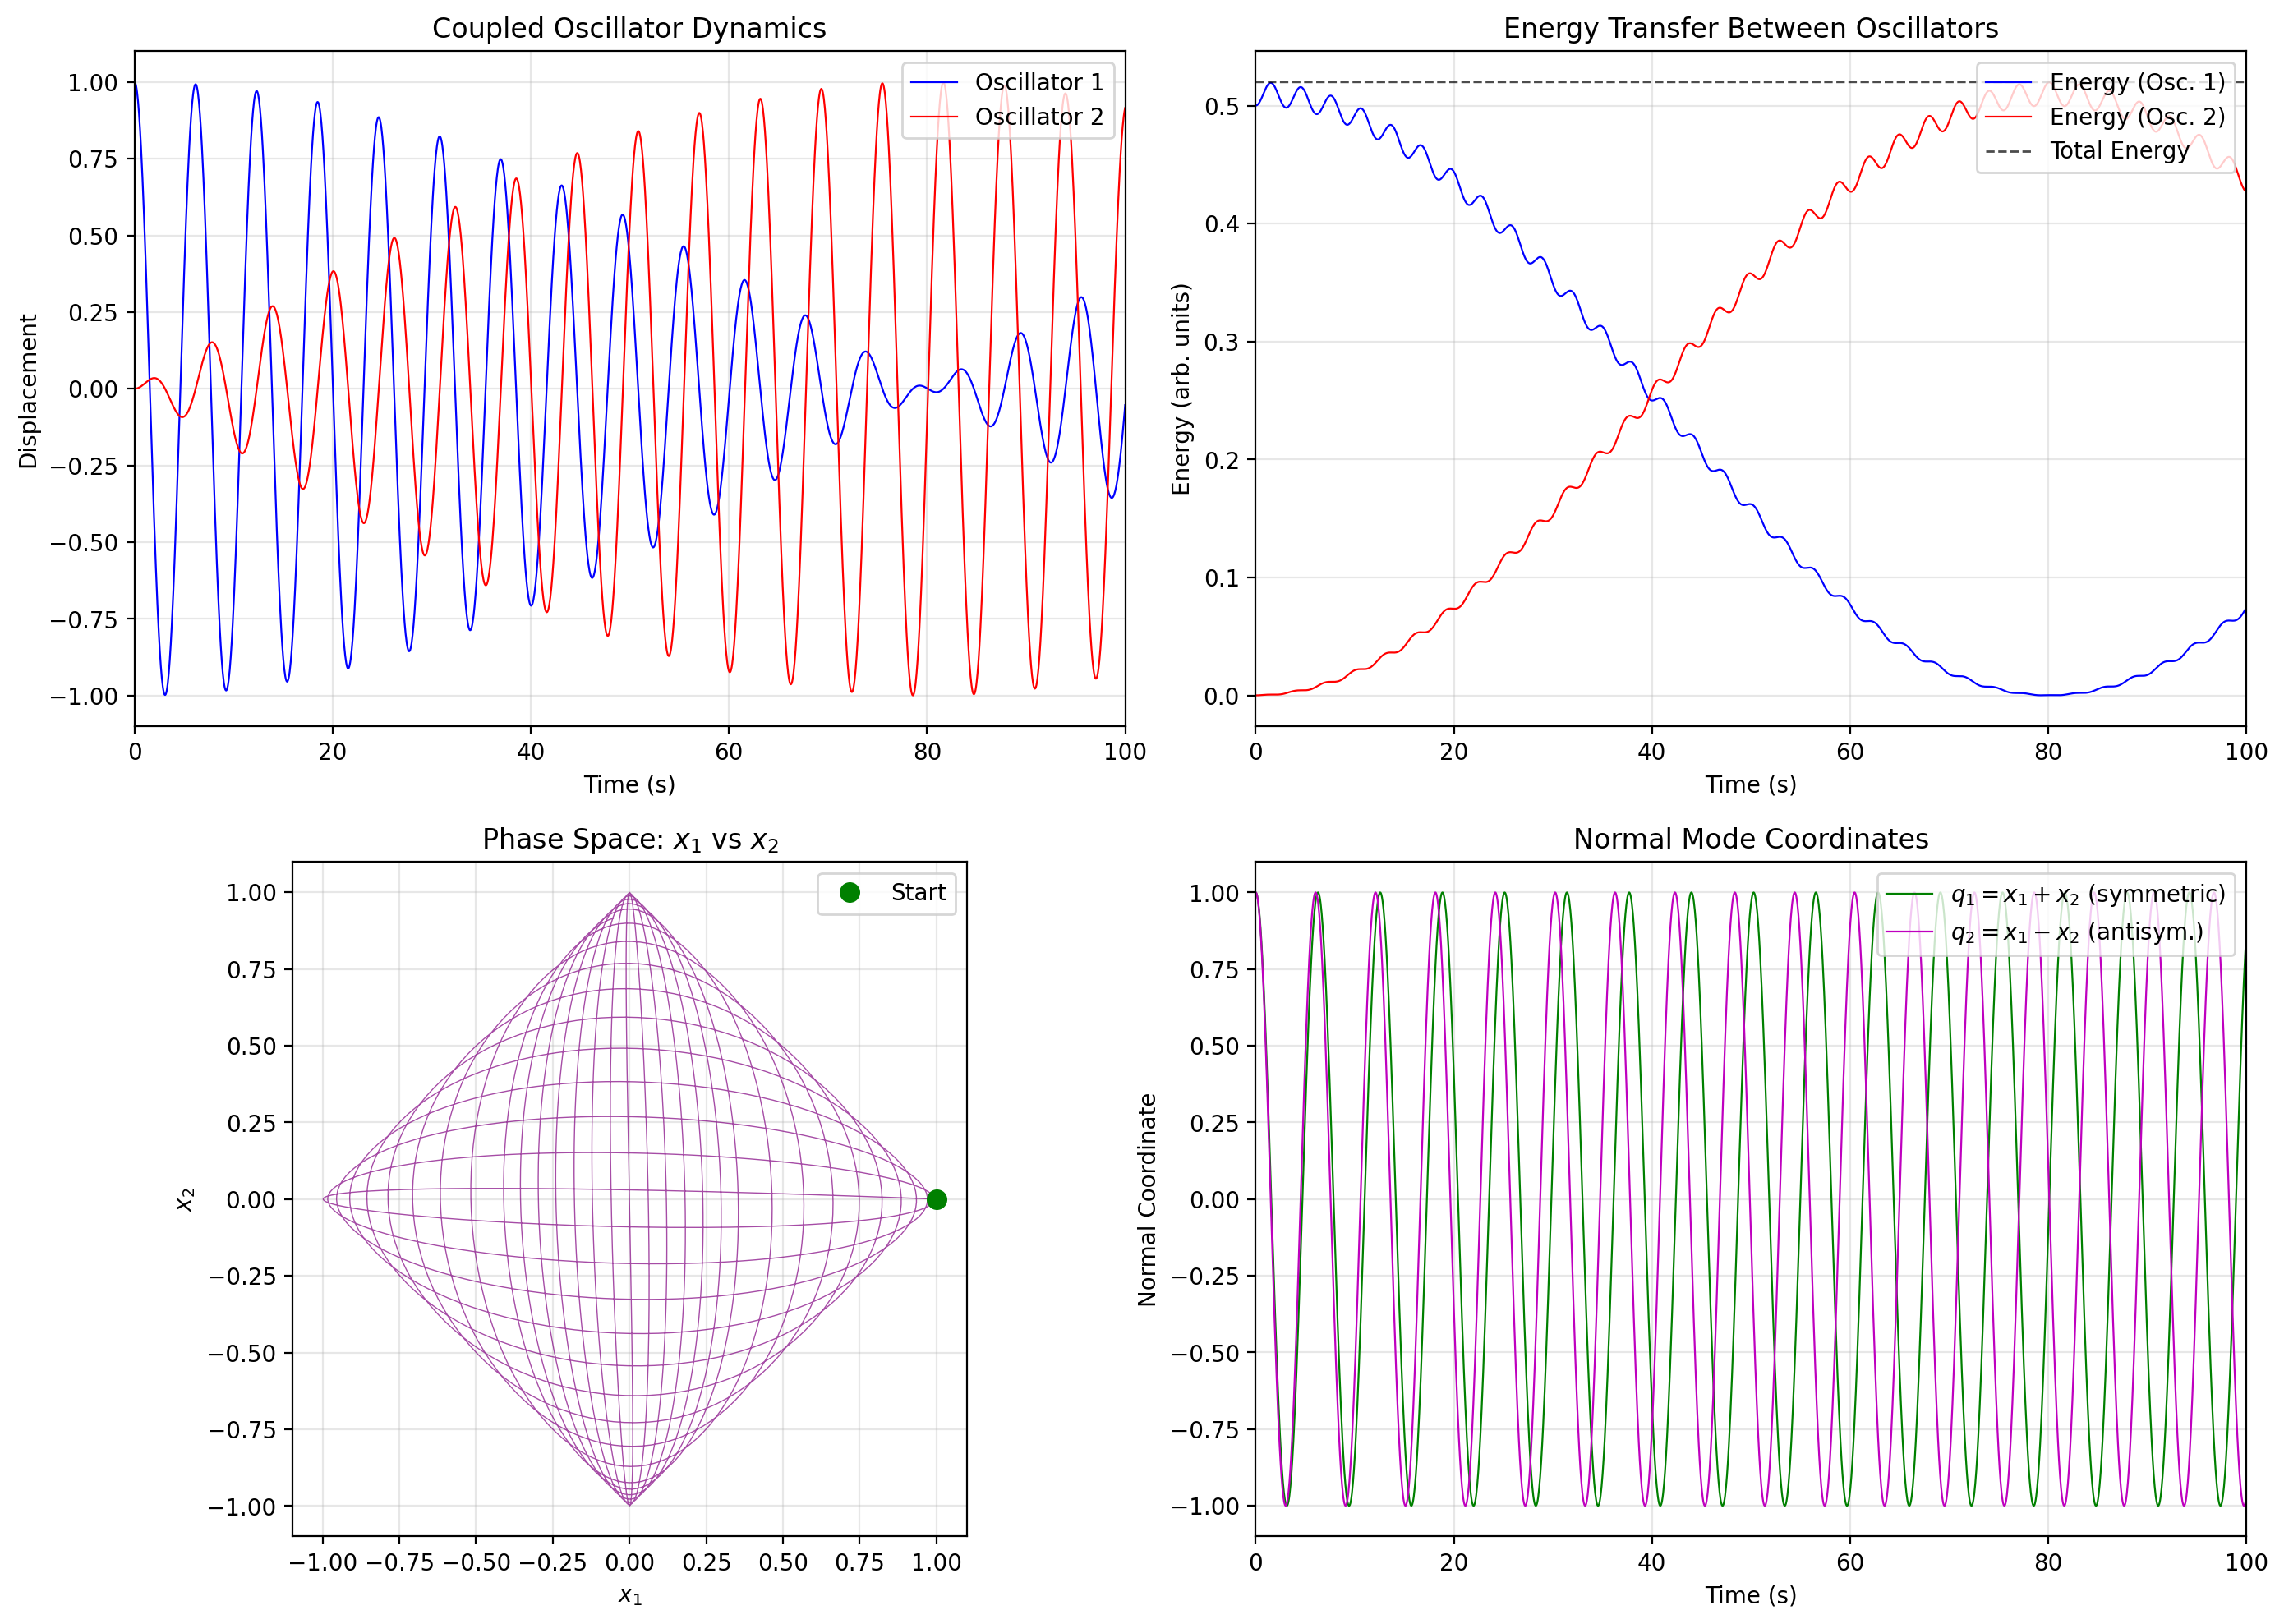


Figure saved to 'plot.png'


In [2]:
# Create comprehensive visualization
fig = plt.figure(figsize=(14, 10))

# Plot 1: Individual oscillator displacements
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(t, x1, 'b-', label='Oscillator 1', linewidth=0.8)
ax1.plot(t, x2, 'r-', label='Oscillator 2', linewidth=0.8)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Displacement')
ax1.set_title('Coupled Oscillator Dynamics')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 100)

# Plot 2: Energy of each oscillator
v1 = solution[:, 1]
v2 = solution[:, 3]
E1 = 0.5 * (v1**2 + omega_0**2 * x1**2)
E2 = 0.5 * (v2**2 + omega_0**2 * x2**2)
E_coupling = 0.5 * omega_c**2 * (x1 - x2)**2
E_total = E1 + E2 + E_coupling

ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(t, E1, 'b-', label='Energy (Osc. 1)', linewidth=0.8)
ax2.plot(t, E2, 'r-', label='Energy (Osc. 2)', linewidth=0.8)
ax2.plot(t, E_total, 'k--', label='Total Energy', linewidth=1.0, alpha=0.7)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Energy (arb. units)')
ax2.set_title('Energy Transfer Between Oscillators')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 100)

# Plot 3: Phase space trajectory
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(x1, x2, 'purple', linewidth=0.5, alpha=0.7)
ax3.plot(x1[0], x2[0], 'go', markersize=8, label='Start')
ax3.set_xlabel('$x_1$')
ax3.set_ylabel('$x_2$')
ax3.set_title('Phase Space: $x_1$ vs $x_2$')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_aspect('equal')

# Plot 4: Normal mode decomposition
q1 = x1 + x2  # Symmetric mode
q2 = x1 - x2  # Antisymmetric mode

ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(t, q1, 'g-', label='$q_1 = x_1 + x_2$ (symmetric)', linewidth=0.8)
ax4.plot(t, q2, 'm-', label='$q_2 = x_1 - x_2$ (antisym.)', linewidth=0.8)
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Normal Coordinate')
ax4.set_title('Normal Mode Coordinates')
ax4.legend(loc='upper right')
ax4.grid(True, alpha=0.3)
ax4.set_xlim(0, 100)

plt.tight_layout()
plt.savefig('coupled_oscillators_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nFigure saved to 'plot.png'")

## Analysis of Results

### Observations

1. **Beat Phenomenon**: The upper-left plot clearly shows the characteristic beating pattern. Initially, oscillator 1 has all the energy and oscillator 2 is at rest. Over time, energy transfers completely to oscillator 2, then back to oscillator 1, repeating periodically.

2. **Energy Conservation**: The upper-right plot demonstrates that while individual oscillator energies vary dramatically, the total system energy remains constant—a verification of our numerical solution's accuracy.

3. **Phase Space Structure**: The Lissajous-like figure in the phase space plot ($x_1$ vs $x_2$) reveals the quasi-periodic nature of the motion. The pattern fills a bounded region but never exactly repeats (unless the frequency ratio is rational).

4. **Normal Mode Independence**: The bottom-right plot shows that each normal coordinate oscillates at a single, constant frequency—confirming the theoretical prediction that normal modes are independent harmonic oscillators.

### Physical Interpretation

The beating phenomenon can be understood as the superposition of two normal modes:

$$x_1(t) = \frac{A}{2}[\cos(\omega_1 t) + \cos(\omega_2 t)] = A\cos\left(\frac{\omega_2 - \omega_1}{2}t\right)\cos\left(\frac{\omega_2 + \omega_1}{2}t\right)$$

This is the product of:
- A slowly varying envelope at the beat frequency $(\omega_2 - \omega_1)/2$
- A rapid oscillation at the mean frequency $(\omega_2 + \omega_1)/2$

### Applications

Coupled oscillator systems appear throughout physics and engineering:

- **Molecular spectroscopy**: Vibrational modes of molecules
- **Solid state physics**: Phonons in crystal lattices
- **Electrical engineering**: Coupled LC circuits
- **Mechanical engineering**: Vibration isolation and tuned mass dampers
- **Quantum mechanics**: Coupled quantum wells and qubits